In [1]:
from utils import *
from IPython.display import Latex

%matplotlib inline
%load_ext lab_black

In [2]:
data_folder = "/home/gillard/Bureau/MISP_Analysis/Back-up/WEIS2022"
output_folder = "/home/gillard/Bureau/PhD School/ETHZ Project/Results"
image_folder = "Results"

In [3]:
events = pd.read_csv(f"{data_folder}/Events.csv")  # , nrows=10000)
attributes = pd.read_csv(f"{data_folder}/Attributes.csv")  # , nrows=1000000)
tags = pd.read_csv(f"{data_folder}/Tags.csv")  # , nrows=10000)
organisations = pd.read_csv(f"{data_folder}/Organisations.csv")  # , nrows=10000)

/home/gillard/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (0,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# attributes = attributes[attributes["Orgc ID"] != 1203]
# attributes["Value"].replace("", np.nan, inplace=True)
# attributes.dropna(subset=["Value"], inplace=True)
Value_ID = attributes["Value"].astype("category").cat.codes
attributes["Value ID"] = Value_ID
attributes = attributes[attributes["Value ID"].duplicated(keep=False)]

In [5]:
attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6614869 entries, 0 to 9423341
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Event ID            object 
 1   Orgc ID             float64
 2   Org ID              float64
 3   Attribute ID        float64
 4   UUID                object 
 5   Attribute Type      object 
 6   Attribute Category  object 
 7   Distribution        float64
 8   Timestamp           float64
 9   Event Date          object 
 10  Event Published     float64
 11  Published           object 
 12  Deleted             object 
 13  Value               object 
 14  Comment             object 
 15  Value ID            int32  
dtypes: float64(6), int32(1), object(9)
memory usage: 832.7+ MB


/home/gillard/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute ID', ylabel='Value ID'>

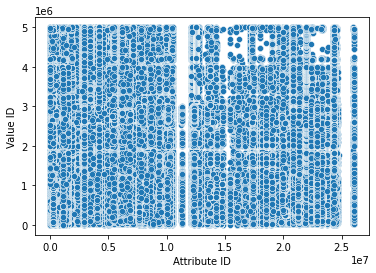

In [6]:
sns.scatterplot(attributes["Attribute ID"], attributes["Value ID"])

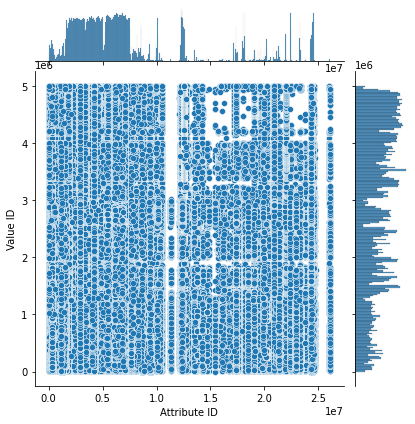

In [7]:
sns.jointplot(x=attributes["Attribute ID"], y=attributes["Value ID"])

ValueError: autodetected range of [nan, nan] is not finite

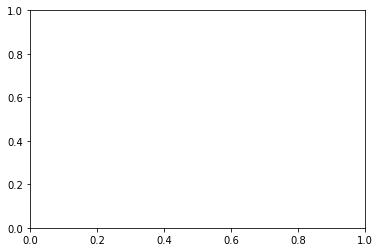

In [8]:
plt.hist2d(attributes["Attribute ID"], attributes["Value ID"], bins=1, cmap="jet")

In [ ]:
Inheritance = attributes["Value ID"].value_counts()[
    attributes["Value ID"].value_counts() > 9
]
# Inheritance = attributes["Value ID"].value_counts(sort=False, ascending=False)
print(Inheritance)

## Representation of the Clusters of Attributes

The size of the circle represent the similar attributes. Then, the more the circle is big, the more attributes are similar

In [ ]:
# Number_of_attr_per_cluster = Inheritance.tolist()
# Val_ID = Inheritance.keys().tolist()
# labels = {}

# Round_Nb = np.zeros((len(Number_of_attr_per_cluster)), dtype=int)
# for idy, y in enumerate(Number_of_attr_per_cluster):
#     if y < 100:
#         Round_Nb[idy] = round(y, -1)
#     else:
#         Round_Nb[idy] = round(y, -2)
# print(Round_Nb)

# plt.figure(figsize=(15, 15))
# Cluster = nx.Graph()
# Cluster.add_nodes_from(Val_ID)
# nx.draw_random(Cluster, node_size=Number_of_attr_per_cluster, label=">10 attributes")
# leg = plt.legend(fancybox=True)
# for item in leg.legendHandles:
#     item.set_visible(False)
# plt.show()

## Open .json from the vectorization of the attributes Values

In [ ]:
matrix_vect_NLP = pd.read_csv("Inheritance_subset.csv")  # , nrows=10000)


attr_nb = matrix_vect_NLP["Unnamed: 0"].to_list()
timestamp_attr = np.zeros(len(attr_nb), dtype=float)

for idy, y in enumerate(attr_nb):
    x = attributes[attributes["Attribute ID"] == y]["Timestamp"]
    print(x, y)
    input()
    # timestamp_attr[idy] = x[idy]
# matrix_vect_NLP.insert(1, "Timestamp", timestamp_attr)


matrix_network = matrix_vect_NLP.drop(["Unnamed: 0"], axis=1)
matrix_vect_NLP

In [ ]:
A = matrix_vect_NLP.to_numpy().T

for i in range(len(A)):
    for j in range(len(A)):
        if i == j:
            A[i, j] = 0timestamp_attr

In [ ]:
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
plt.figure(1, figsize=(15, 15))
nx.draw(
    G,
    with_labels=True,
    width=1.0,
    font_weight="bold",
    arrowstyle="-|>",
    arrowsize=10,
)

In [ ]:
# nx.degree_centrality(G)

nx.closeness_centrality(G)